Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Step 2: Loading Dataset

In [ ]:
df = pd.read_csv("CarPricePrediction.csv")  
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Step 3: Data Inspection

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Step 4: Handling Missing Values

In [4]:
df.dropna(inplace=True)


Step 5: EDA

Text(0.5, 1.0, 'Price by Fuel Type')

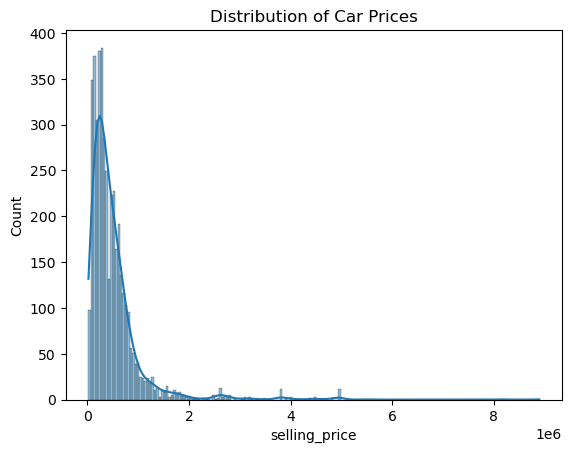

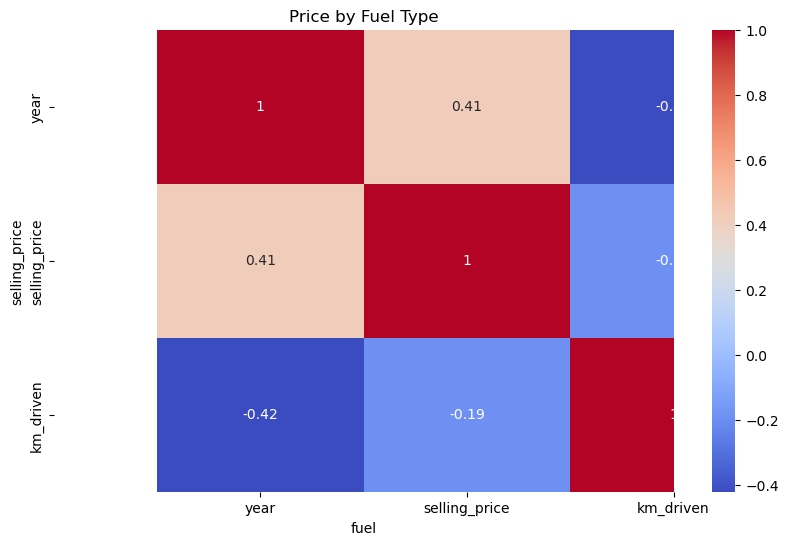

In [8]:
# Histogram of Selling Price
sns.histplot(df['selling_price'], kde=True)
plt.title("Distribution of Car Prices")

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

# Boxplot of Price vs Fuel Type
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title("Price by Fuel Type")


Step 6: Preprocessing

In [12]:
# Encoding Categorical Features
label_cols = ['fuel', 'transmission', 'owner', 'name','seller_type' ]
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Step 7: Model Training

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Step 8: Prediction & Evaluation

In [14]:
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 221820.84345082458
MSE: 184332080354.49103
RMSE: 429339.12045665144
R² Score: 0.39596976258882


Step 9: Feature Importance

<Axes: title={'center': 'Feature Importance'}>

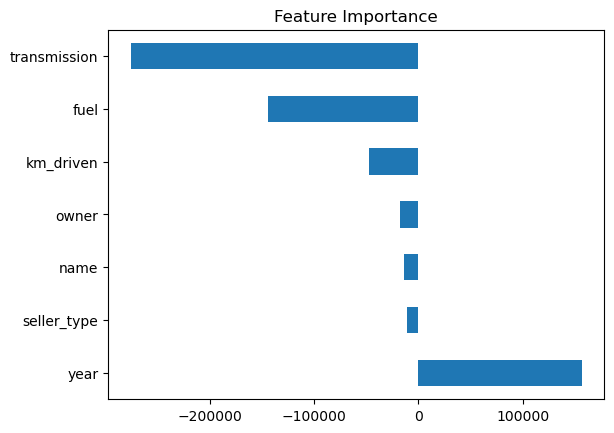

In [15]:
feature_importance = pd.Series(lr_model.coef_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh', title='Feature Importance')
